### Project: Analysis of Videogame Sales

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


Loading The Dataset which can be found at: https://www.kaggle.com/datasets/gregorut/videogamesales
or in the file folder in this project as well.

In [24]:
# Load the dataset
df = pd.read_csv("vgsales.csv")
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [25]:
# --- 1. Initial Assessment ---
# Getting basic information about the dataset

print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nLast 5 rows of the dataset:")
print(df.tail())
print("\nRows and Columns in the dataset:")
print(df.shape)
print("\nDescriptive statistics of the dataset:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

First 5 rows of the dataset:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Pl

In [26]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


## 2. Data Cleaning

Based on the initial assessment, the following cleaning steps are required:
1.  Handle the missing values in the `Year` and `Publisher` columns.
2.  Correct the data type of the `Year` column from `float` to `int`.

### Handling Missing Values

The `Year` column is missing 271 values and `Publisher` is missing 58. This represents a very small fraction of the total 16,598 rows. For this analysis, the best strategy is to drop these rows entirely, as imputing a year or publisher could be inaccurate and the data loss is minimal.

In [27]:
# --- 2a. Implementing the Cleaning Plan ---

# Drop rows where 'Year' or 'Publisher' is missing
# The 'inplace=True' argument modifies the DataFrame directly.
df.dropna(subset=['Year', 'Publisher'], inplace=True)

# After dropping rows with NaN, we can now safely convert the 'Year' column to integer
df['Year'] = df['Year'].astype(int)

print("Data cleaning complete. Missing rows dropped and 'Year' column converted to integer.")

Data cleaning complete. Missing rows dropped and 'Year' column converted to integer.


In [28]:
# --- 2b. Verifying the Cleaning ---
# Check that the cleaning steps worked as expected.

print("--------- After Cleaning ---------")
df.info()

print("\n\n--------- Missing Values Check ---------")
print(df.isnull().sum())

--------- After Cleaning ---------
<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


--------- Missing Values Check ---------
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_

## 3. Exploratory Data Analysis (EDA)

### Analysis 1: Most Common Game Genres

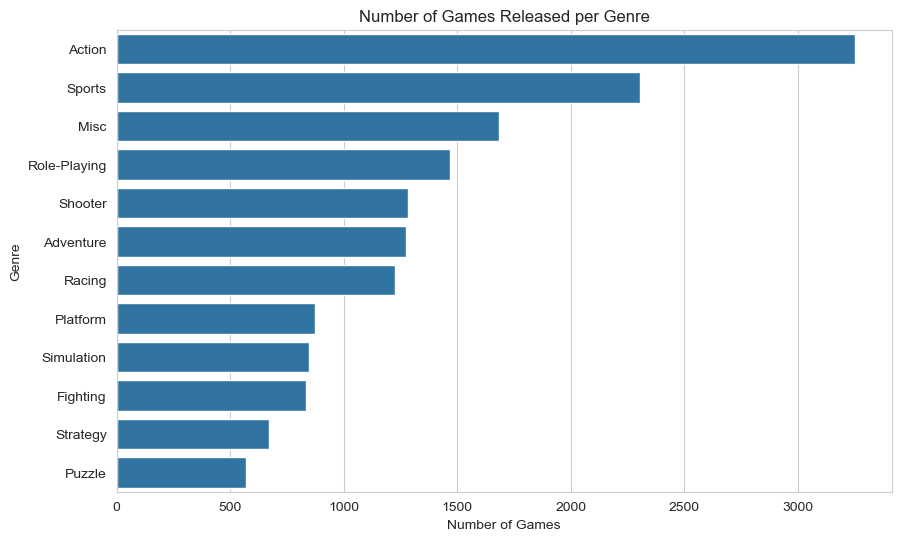

In [29]:
# Set a consistent style for the plots
sns.set_style('whitegrid')

# Plotting the top 10 Genres
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index)
plt.title('Number of Games Released per Genre')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

**Observation:** This bar chart displays the total number of games released for the top 10 most frequent genres in the dataset. "Action" games are by far the most numerous, with over 3,000 titles. "Sports" games are a distant second, followed by a variety of other genres including "Misc", "Role-Playing", and "Shooter".

**Insight:** The dominance of the "Action" genre suggests it is a broad and popular category that publishers frequently target. The high number of "Misc" (Miscellaneous) titles indicates a wide variety of games that don't fit into traditional categories, highlighting the diversity of the gaming market.

### Analysis 2: Top Platforms by Game Releases

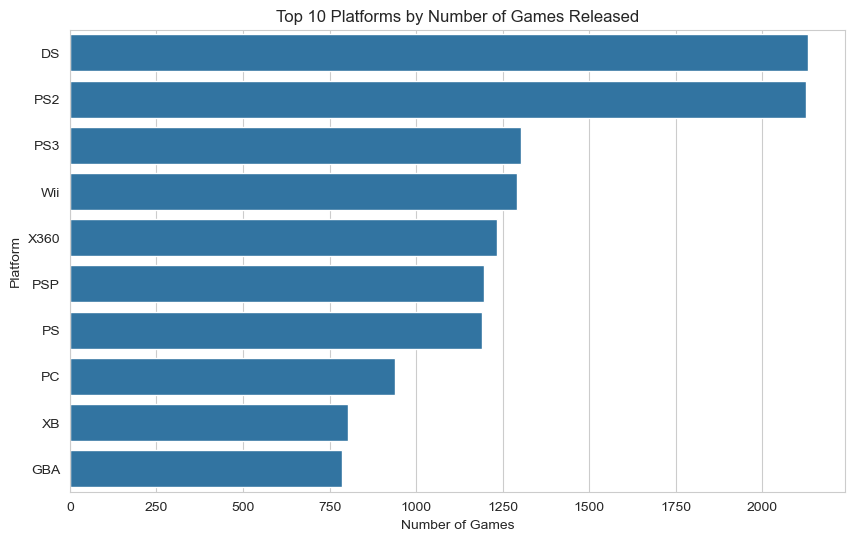

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Platform', order=df['Platform'].value_counts().index[:10])
plt.title('Top 10 Platforms by Number of Games Released')
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.show()

**Observation:** This chart ranks the top 10 gaming platforms by the total number of games released. The "DS" (Nintendo DS) and "PS2" (PlayStation 2) lead with the highest volume of titles, each having over 2,000 games in this dataset.

**Insight:** The PS2 and DS represent two of the best-selling consoles of all time, and this is reflected in the sheer size of their game libraries. Their long lifespans and broad market appeal encouraged extensive third-party development. Platforms like the "PS3", "Wii", and "Xbox 360" also show strong library sizes, representing the highly competitive "HD" generation of consoles.

### Analysis 3: Top Publishers by Games Published

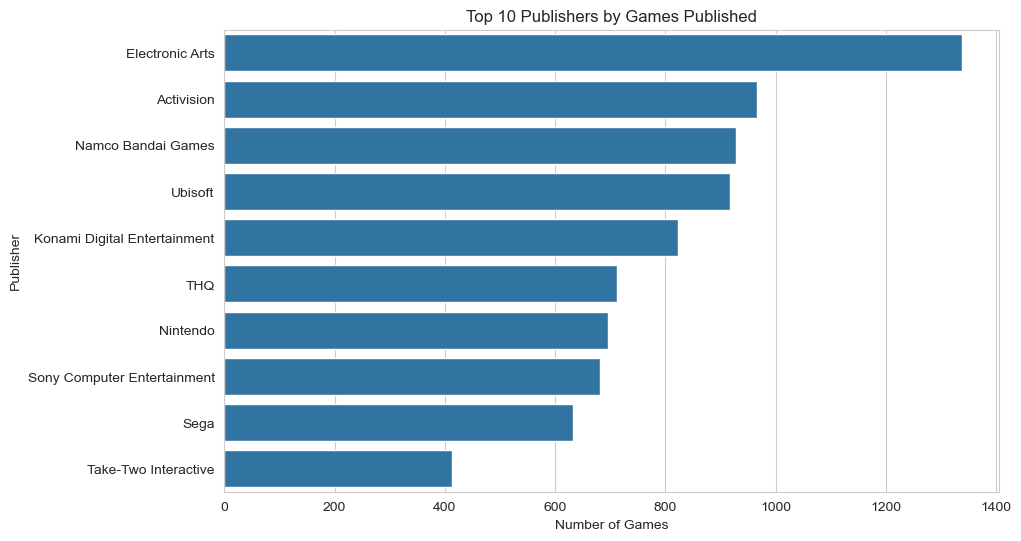

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Publisher', order=df['Publisher'].value_counts().index[:10])
plt.title('Top 10 Publishers by Games Published')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.show()

**Observation:** This chart shows the top 10 publishers based on the number of games they have released. "Electronic Arts" (EA) is the most prolific publisher in this dataset, with well over 1,300 titles. "Activision" and "Namco Bandai Games" follow, each with close to 1,000 published games.

**Insight:** Publishers like EA and Activision are known for their large scale and frequent releases, often with annualized series (like sports or shooter games), which explains their high ranking. The presence of Japanese publishers like "Namco Bandai", "Konami", and "Capcom" in the top 10 highlights their significant global impact on the industry.

### Analysis 4: Total Global Sales by Genre

C:\Users\daksh\AppData\Local\Temp\ipykernel_18980\957178614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')


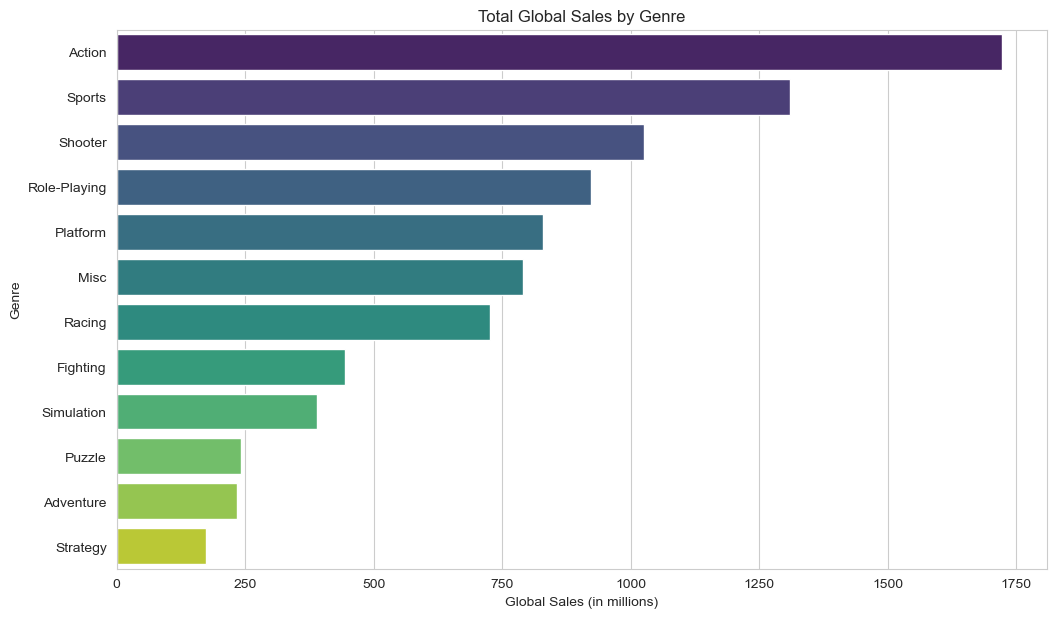

In [32]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.title('Total Global Sales by Genre')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre')
plt.show()

**Observation:** The bar chart visualizes the total global sales (in millions of units) for each game genre. "Action" games lead with the highest cumulative sales, followed by "Sports" and "Shooter" genres.

**Insight:** This chart reinforces the market dominance of the "Action" genre, proving it is not only common but also the most lucrative. While "Sports" is the second most common genre, "Shooter" games have generated nearly as much revenue with fewer titles, suggesting a higher average sales figure per game. "Platform" and "Role-Playing" games also represent major market segments with over $600 million in sales each.

### Analysis 5: Top Publishers by Global Sales

C:\Users\daksh\AppData\Local\Temp\ipykernel_18980\962613810.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette='rocket')


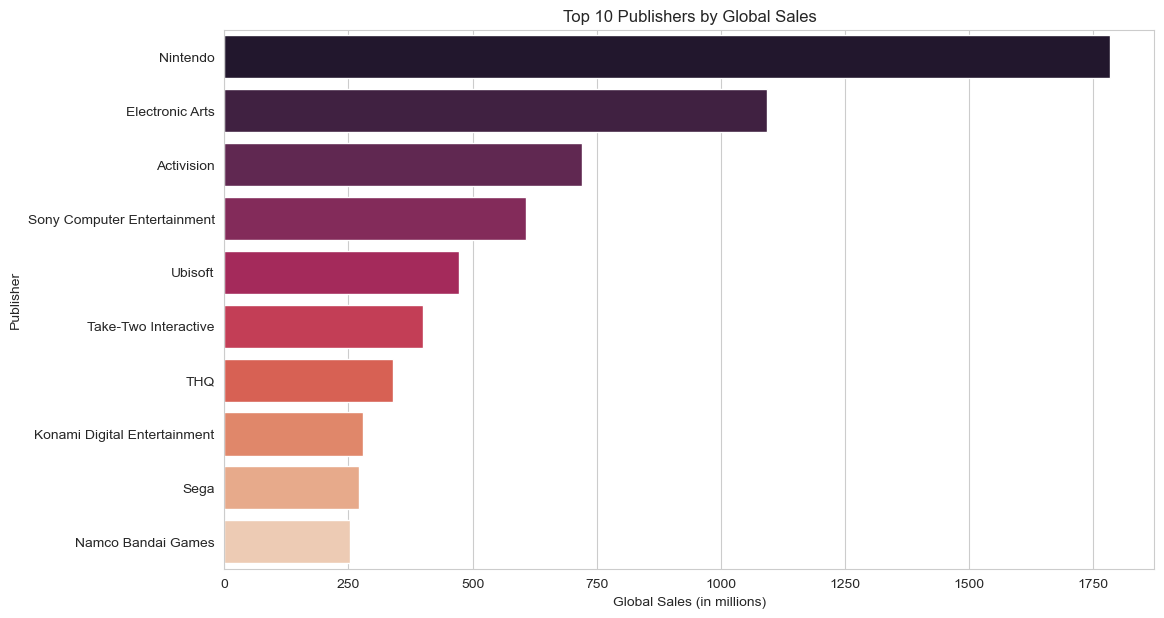

In [33]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette='rocket')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Publisher')
plt.show()

**Observation:** This chart displays the cumulative global sales for the top 10 highest-grossing publishers. "Nintendo" is the undisputed market leader, with total sales exceeding $1.7 billion, almost double that of the next publisher, "Electronic Arts".

**Insight:** Nintendo's extraordinary success can be attributed to its ownership of some of the most powerful and enduring franchises in gaming history (like Mario, Zelda, and Pokémon) and its ability to create consoles with mass-market appeal (like the Wii and DS). While EA was the most prolific publisher, this chart shows that Nintendo's focus on first-party quality has translated into far greater financial success.

### Analysis 6: Global Sales Trend Over Time

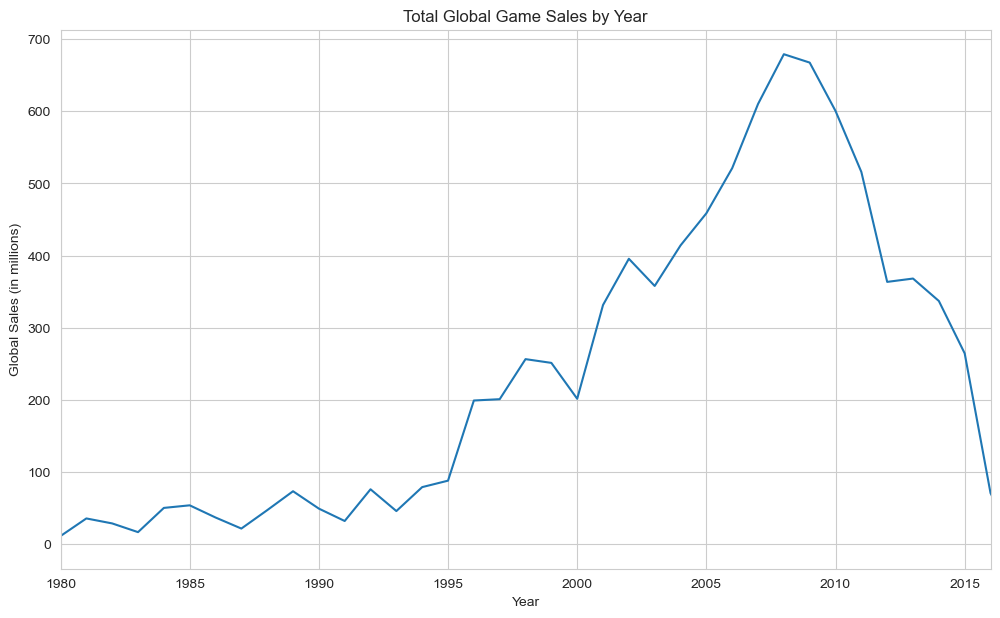

In [34]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12, 7))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Total Global Game Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.xlim(1980, 2016) # Optional: clean up the x-axis range
plt.show()

**Observation:** This line plot illustrates the trend of total global video game sales from 1980 to the end of the dataset's range. The industry shows gradual growth through the 80s and 90s, followed by a dramatic surge in the mid-2000s. The market reached its peak in **2008-2009**, after which there was a noticeable decline.

**Insight:** The peak in the late 2000s perfectly coincides with the "golden age" of the 7th console generation, particularly the massive mainstream success of the Nintendo Wii and the strong performance of the PlayStation 3 and Xbox 360. The subsequent decline could be attributed to several factors, including the global financial crisis and the market shift towards mobile and digital gaming, which may not be fully captured in this retail-focused dataset.

### Analysis 7: Regional Genre Preferences

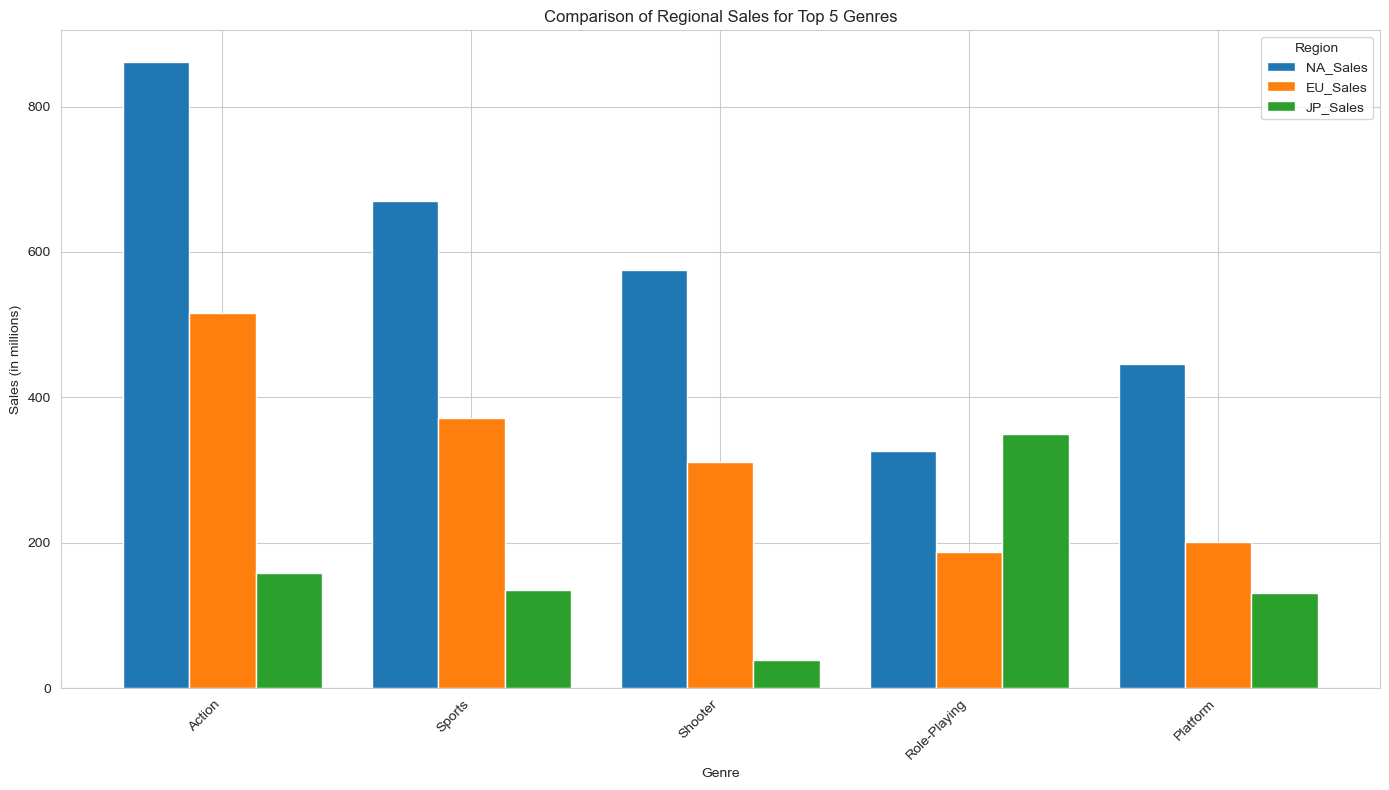

In [37]:
# Group by Genre and sum the regional sales
regional_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# Get the top 5 genres based on global sales to keep the plot clean
top_5_genres = genre_sales.sort_values(ascending=False).head(5).index
regional_sales_top5 = regional_sales.loc[top_5_genres]

# Plot the grouped bar chart
regional_sales_top5.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Comparison of Regional Sales for Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels to prevent overlap
plt.legend(title='Region')
plt.tight_layout() # Adjust layout
plt.show()

**Observation:** This grouped bar chart compares the sales contributions of North America (NA), Europe (EU), and Japan (JP) for the top 5 highest-grossing genres globally. For genres like "Action", "Sports", and "Shooter", North America is the largest market, followed by Europe.

**Insight:** This visualization clearly highlights distinct regional tastes. While NA and EU share similar preferences, the Japanese market is unique. For the "Role-Playing" genre, Japanese sales are significantly higher than in Europe and nearly equal to those in North America, indicating a strong cultural preference for RPGs. Conversely, Japan shows very little interest in the "Shooter" genre compared to the West. This insight is crucial for any publisher planning a global release strategy.

In [38]:
# --- 4. Final Output ---
# Exporting the fully cleaned DataFrame to a new CSV file.
df.to_csv('vgsales_cleaned.csv', index=False)

print("Cleaned data successfully saved to 'vgsales_cleaned.csv'")

Cleaned data successfully saved to 'vgsales_cleaned.csv'


## 5. Project Conclusion

This project involved a systematic process of cleaning and analyzing the Video Game Sales dataset.

**Cleaning Process:** The initial data contained missing values in the `Year` and `Publisher` columns, which were handled by removing the affected rows. The `Year` column's data type was also corrected from float to integer.

**Key Findings from EDA:**
1.  **Industry Leaders:** The analysis revealed that **Action** games are both the most numerous and the highest-grossing genre. In terms of publishers, **Nintendo** is the clear market leader in sales, significantly outpacing competitors like Electronic Arts and Activision.
2.  **Market Trends:** A time-series analysis showed that the video game industry saw a massive boom in sales, peaking around **2008-2009**. This likely corresponds to the height of the Nintendo Wii, PS3, and Xbox 360 generation.
3.  **Regional Tastes:** The regional sales comparison highlighted different market preferences. For example, while North America and Europe have similar tastes, Japan shows a notably stronger preference for the **Role-Playing** genre.

Overall, the cleaned dataset is now robust and suitable for further analysis or predictive modeling.